In [572]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#기본 환경설정
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 시각화 한글폰트 호환 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid', font_scale = 1.1)

In [71]:
%pwd

'C:\\Users\\User\\Desktop\\3기_정재희_DX_수도권 1반\\공모전\\청소년 공모전\\data\\상담주제'

# 센터현황 데이터

## 청소년쉼터현황 데이터

In [38]:
# 청소년쉼터현황 데이터 읽어오기
y_shelter = pd.read_csv("2022청소년쉼터현황.csv", encoding='cp949')
y_shelter.head()

,시설명,시도명,시군구명,주소,전화번호,데이터기준일자
0,서울시립청소년이동쉼터(서북권),서울,종로구,"서울 종로구 종로 11길 11, 3층(인사동 YMCA 별관)",02-722-1318,2022-07-31
1,서울시립청소년이동쉼터(서남권),서울,종로구,"서울 종로구 종로 11길 11, 3층(인사동 YMCA 별관)",02-722-1318,2022-07-31
2,서울시립청소년이동쉼터(동북권),서울,강동구,서울 강동구 양재대로81길 39 (성내동) B1층,02-6239-2014,2022-07-31
3,서울시립청소년이동쉼터(동남권),서울,강동구,서울 강동구 양재대로81길 39 (성내동) B1층,02-6239-2014,2022-07-31
4,서울특별시청소년일시쉼터(용산일시),서울,용산구,서울 용산구 만리재로 156-1(서계로),02-718-1318,2022-07-31


### 청소년쉼터현황 데이터 탐색

In [668]:
y_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시설명      137 non-null    object
 1   시도명      137 non-null    object
 2   시군구명     137 non-null    object
 3   주소       137 non-null    object
 4   전화번호     137 non-null    object
 5   데이터기준일자  137 non-null    object
 6   구분       137 non-null    object
dtypes: object(7)
memory usage: 7.6+ KB


In [669]:
y_shelter.shape

(137, 7)

In [80]:
# 행정구역(시도)별 청소년쉼터 개수 파악
y_shelter.groupby(by='시도명', as_index=False)[['시군구명']].value_counts().sort_values('count', ascending=False)

,시도명,시군구명,count
0,강원,춘천시,6
3,경기,성남시,5
65,제주,제주시,4
72,충북,청주시,4
39,부산,사상구,3
...,...,...,...
49,서울,강남구,1
50,서울,용산구,1
51,서울,중랑구,1
20,경기,화성시,1


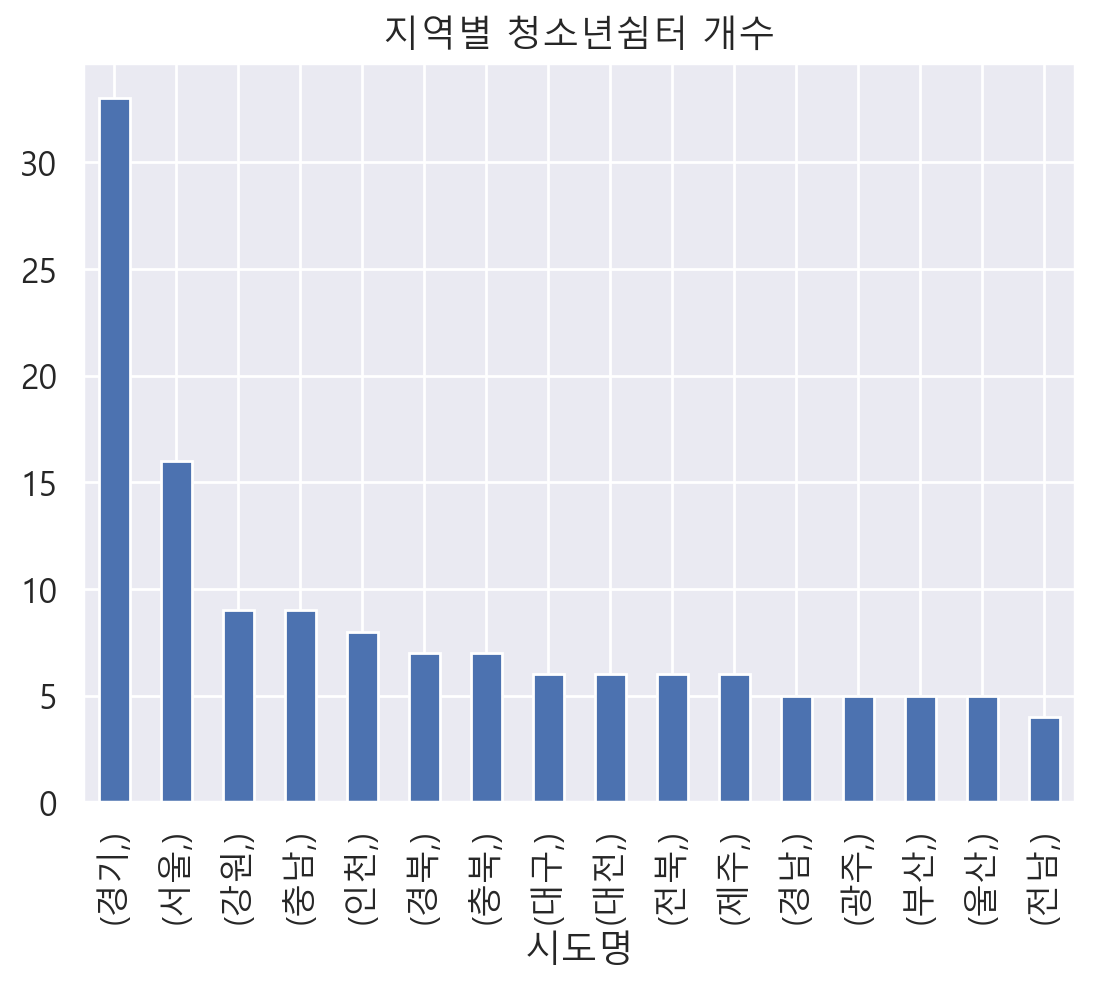

In [671]:
# 행정구역(시도)별 청소년쉼터 개수 시각화
y_shelter[['시도명']].value_counts().plot(kind='bar')
plt.title('지역별 청소년쉼터 개수')
plt.show()

### 청소년쉼터현황 데이터 전처리

#### 1) 이동형쉼터, 고정형쉼터 구분 칼럼 추가

In [168]:
# 이동형 쉼터 구분 컨디션
type_move =list(y_shelter.loc[y_shelter['시설명'].str.contains('이동')].index)
# 이동형 범주 추가
y_shelter = y_shelter.assign(구분="")
y_shelter['구분'].iloc[type_move] = '이동형'
# 고정형 범주 추가
type_fixed = list(y_shelter.loc[y_shelter['구분'] == ''].index)
y_shelter['구분'].iloc[type_fixed] = '고정형'
y_shelter

,시설명,시도명,시군구명,주소,전화번호,데이터기준일자,구분
0,서울시립청소년이동쉼터(서북권),서울,종로구,"서울 종로구 종로 11길 11, 3층(인사동 YMCA 별관)",02-722-1318,2022-07-31,이동형
1,서울시립청소년이동쉼터(서남권),서울,종로구,"서울 종로구 종로 11길 11, 3층(인사동 YMCA 별관)",02-722-1318,2022-07-31,이동형
2,서울시립청소년이동쉼터(동북권),서울,강동구,서울 강동구 양재대로81길 39 (성내동) B1층,02-6239-2014,2022-07-31,이동형
3,서울시립청소년이동쉼터(동남권),서울,강동구,서울 강동구 양재대로81길 39 (성내동) B1층,02-6239-2014,2022-07-31,이동형
4,서울특별시청소년일시쉼터(용산일시),서울,용산구,서울 용산구 만리재로 156-1(서계로),02-718-1318,2022-07-31,고정형
5,서울시립강북청소년드림센터,서울,강북구,서울 강북구 한천로140길 5-26(수유3동),02-6435-7979,2022-07-31,고정형
6,서울시립강남일시청소년쉼터,서울,강남구,서울 강남구 봉은사로 114길 43 신관 5층,02-2051-1371,2022-07-31,고정형
7,은평구립일시청소년쉼터,서울,은평구,서울 은평구 통일로 89길 6-20 (갈현동),02-382-1388,2022-07-31,고정형
8,강서청소년쉼터,서울,강서구,"서울 강서구 초록마을로 10길 5, 201호",02-2697-7377,2022-07-31,고정형
9,서울시립신림청소년단기쉼터,서울,관악구,서울 관악구 신림로 376 대경빌딩 3층,02-876-7942,2022-07-31,고정형


#### 2) 불필요한 칼럼 삭제 및 칼럼 재정렬
- 주소, 전화번호, 데이터기준일자
- 시도명, 시군구명, 시설명, 구분 순서로 칼럼 재정렬

In [169]:
# 불필요한 칼럼 삭제
del_cols = ['주소', '전화번호', '데이터기준일자']
y_shelter_preset = y_shelter.drop(del_cols, axis=1)
print(y_shelter_preset.info())
display(y_shelter_preset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시설명     137 non-null    object
 1   시도명     137 non-null    object
 2   시군구명    137 non-null    object
 3   구분      137 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB
None


,시설명,시도명,시군구명,구분
0,서울시립청소년이동쉼터(서북권),서울,종로구,이동형
1,서울시립청소년이동쉼터(서남권),서울,종로구,이동형
2,서울시립청소년이동쉼터(동북권),서울,강동구,이동형
3,서울시립청소년이동쉼터(동남권),서울,강동구,이동형
4,서울특별시청소년일시쉼터(용산일시),서울,용산구,고정형


In [170]:
# 칼럼 재정렬
y_shelter_preset = y_shelter_preset[['시도명', '시군구명', '시설명', '구분']]
y_shelter_preset

,시도명,시군구명,시설명,구분
0,서울,종로구,서울시립청소년이동쉼터(서북권),이동형
1,서울,종로구,서울시립청소년이동쉼터(서남권),이동형
2,서울,강동구,서울시립청소년이동쉼터(동북권),이동형
3,서울,강동구,서울시립청소년이동쉼터(동남권),이동형
4,서울,용산구,서울특별시청소년일시쉼터(용산일시),고정형
5,서울,강북구,서울시립강북청소년드림센터,고정형
6,서울,강남구,서울시립강남일시청소년쉼터,고정형
7,서울,은평구,은평구립일시청소년쉼터,고정형
8,서울,강서구,강서청소년쉼터,고정형
9,서울,관악구,서울시립신림청소년단기쉼터,고정형


#### 3) 데이터분석 및 시각화

In [674]:
# 쉼터 종류별 분포 확인
cond_fixed = (y_shelter_preset['구분'] == '고정형')
cond_move = (y_shelter_preset['구분'] == '이동형')
print('고정형:', y_shelter_preset[cond_fixed].shape[0], '이동형:', y_shelter_preset[cond_move].shape[0])

고정형: 125 이동형: 12


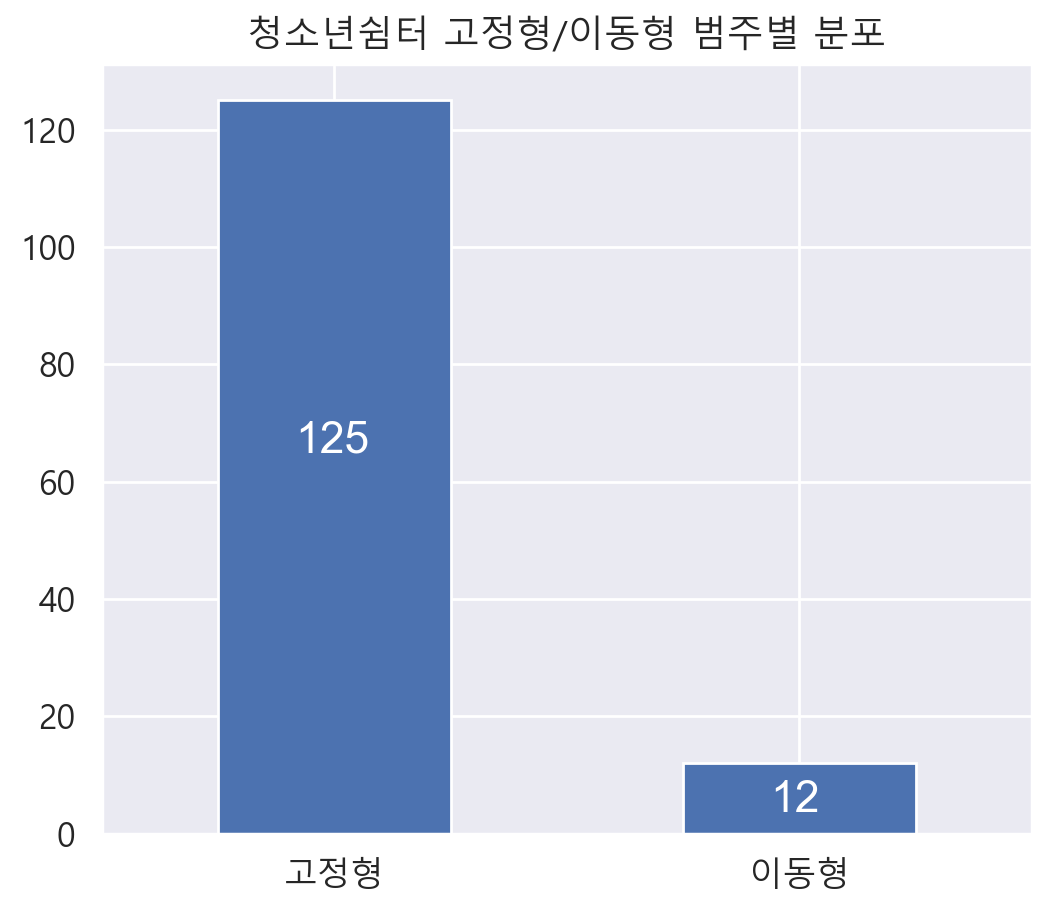

In [675]:
# 청소년쉼터 종류(범주)별 분포
font1 = {'family': 'Arial',
      'color':  'white',
      'weight': 'normal',
      'size': 16}

font2 = {'family': 'Times New Roman',
      'color':  'blue',
      'weight': 'bold',
      'size': 12,
      'alpha': 0.7}

font3 = {'family': 'Arial',
      'color':  'forestgreen',
      'style': 'italic',
      'size': 14}

plt.figure(figsize=(6, 5))
y_shelter_preset['구분'].value_counts().plot(kind='bar')
plt.title('청소년쉼터 고정형/이동형 범주별 분포')
plt.xticks(rotation=0)
plt.text(-0.085, 65, y_shelter_preset[cond_fixed].shape[0], fontdict=font1)
plt.text(0.937, 3.7, y_shelter_preset[cond_move].shape[0], fontdict=font1 )
plt.show()

인사이트:
- 고정형이 125곳 / 이동형이 12곳으로 이동형 쉼터에 대한 개수가 현저히 낮다

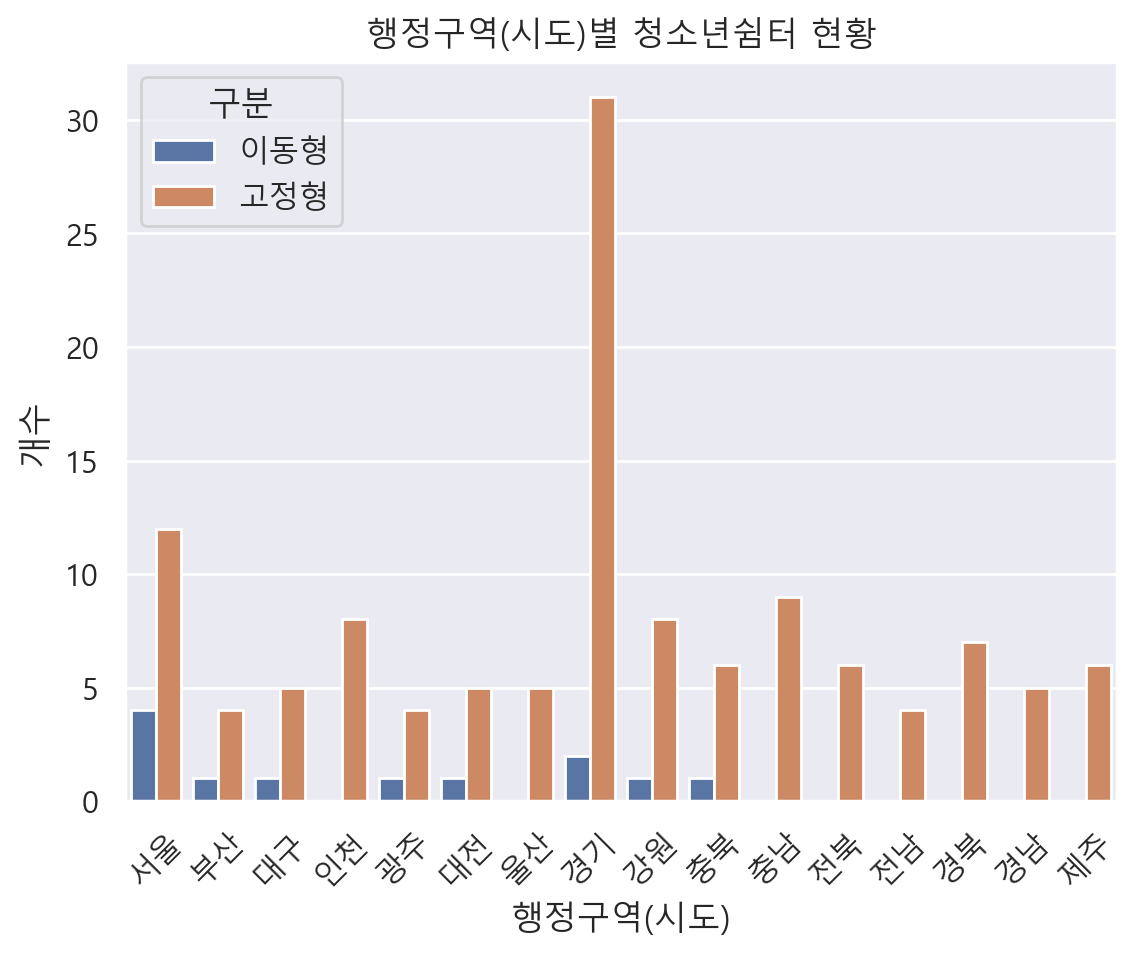

In [233]:
# 행정구역(시도)별 청소년쉼터 현황 시각화
sns.countplot(data=y_shelter_preset, x='시도명', hue='구분')
plt.xticks(rotation=45)
plt.ylabel('개수')
plt.xlabel('행정구역(시도)')
plt.title('행정구역(시도)별 청소년쉼터 현황')
plt.show()

## 청소년상담복지센터 현황 데이터

In [39]:
# 청소년상담복지센터현황 데이터 읽어오기
y_wcenter = pd.read_csv("2022청소년상담복지센터현황.csv", encoding='cp949')
y_wcenter.head()

,지역,센터명,시도명,시군구명,주소,전화번호_1,전화번호_2,전화번호_3,홈페이지
0,서울,서울시청소년상담복지센터,서울특별시,중구,(04543) 서울특별시 중구 을지로 11길 23 7층,02-2285-1318,02-2285-1318,02-2285-1315,www.teen1318.or.kr
1,서울,노원구청소년상담복지센터,서울특별시,노원구,(01616) 서울특별시 노원구 수락산로212-19 2층,02-2091-1388,02-2091-1388,02-2091-1389,www.nowonyouthcenter.org
2,서울,양천구청소년상담복지센터,서울특별시,양천구,"(08067) 서울특별시 양천구 남부순환로83길 53, 신월6동 행정복합타운 2층",02-2646-8341,02-2646-8341,02-2646-8342,http://yangcheon1388.or.kr/
3,서울,영등포구청소년상담복지센터,서울특별시,영등포구,(07317) 서울특별시 영등포구 도영로22길 36 해광빌딩 2층,02-2676-6114,02-844-0924,02-2636-2071,www.young1318.com
4,서울,동작구청소년상담복지센터,서울특별시,동장구,(07062) 서울특별시 동작구 여의대방로 20길 61 시립보라매청소년센터 슬기동 2층,02-845-1388,02-834-1355,02-831-0365,http://djyc1388.or.kr/


### 청소년상담복지센터 데이터 탐색

In [88]:
# 지역별 특정 시군구에 위치한 시설 개수
y_wcenter.groupby(by='지역', as_index=False)[['시군구명']].value_counts()

,지역,시군구명,count
0,강원,춘천시,2
1,강원,강릉시,1
2,강원,삼척시,1
3,강원,속초시,1
4,강원,영월군,1
...,...,...,...
214,충북,음성군,1
215,충북,제천시,1
216,충북,증평군,1
217,충북,진천군,1


In [234]:
y_wcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      239 non-null    object
 1   센터명     239 non-null    object
 2   시도명     239 non-null    object
 3   시군구명    239 non-null    object
 4   주소      239 non-null    object
 5   전화번호_1  239 non-null    object
 6   전화번호_2  237 non-null    object
 7   전화번호_3  237 non-null    object
 8   홈페이지    233 non-null    object
dtypes: object(9)
memory usage: 16.9+ KB


#### 1) 불필요한 칼럼 삭제 및 칼럼 rename & 재정렬
- 삭제필요: '시도명', '주소', '전화번호_1', '전화번호_2', '전화번호_3', '홈페이지'
- 시도명, 시군구명, 시설명으로 rename 후 해당 순서로 칼럼 재정렬

In [235]:
# 불필요한 칼럼 삭제
del_cols = ['시도명', '주소', '전화번호_1', '전화번호_2', '전화번호_3', '홈페이지']
y_wcenter_preset = y_wcenter.drop(del_cols, axis=1)
y_wcenter_preset.head()

,지역,센터명,시군구명
0,서울,서울시청소년상담복지센터,중구
1,서울,노원구청소년상담복지센터,노원구
2,서울,양천구청소년상담복지센터,양천구
3,서울,영등포구청소년상담복지센터,영등포구
4,서울,동작구청소년상담복지센터,동장구


In [240]:
# 칼럼 rename & 재정렬
y_wcenter_preset.rename(columns={'지역':'시도명', '센터명':'시설명'}, inplace=True)
y_wcenter_preset = y_wcenter_preset[['시도명', '시군구명', '시설명']]
y_wcenter_preset.head()

,시도명,시군구명,시설명
0,서울,중구,서울시청소년상담복지센터
1,서울,노원구,노원구청소년상담복지센터
2,서울,양천구,양천구청소년상담복지센터
3,서울,영등포구,영등포구청소년상담복지센터
4,서울,동장구,동작구청소년상담복지센터


#### 3) 데이터분석 및 시각화

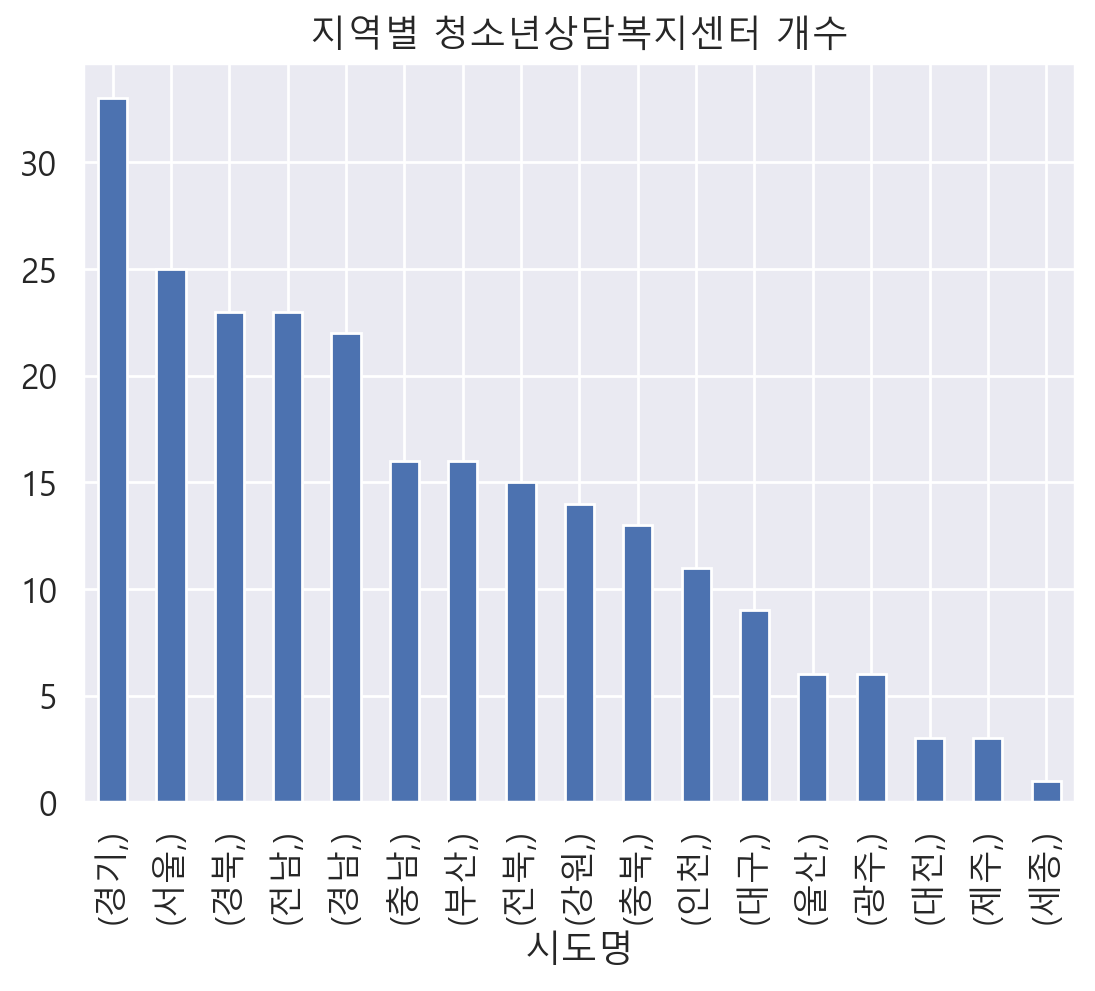

In [676]:
# 행정구역(시도)별 시설 개수 시각화
y_wcenter_preset[['시도명']].value_counts().plot(kind='bar')
plt.title('지역별 청소년상담복지센터 개수')
plt.show()

In [398]:
# 행정구역(시도)별 시설 개수 확인
y_wcenter_preset[['시도명']].value_counts()
y_wcenter_preset.groupby('시도명', as_index=False)['시도명'].value_counts().sort_values('count', ascending=False).reset_index(drop=True)

,시도명,count
0,경기,33
1,서울,25
2,경북,23
3,전남,23
4,경남,22
5,충남,16
6,부산,16
7,전북,15
8,강원,14
9,충북,13


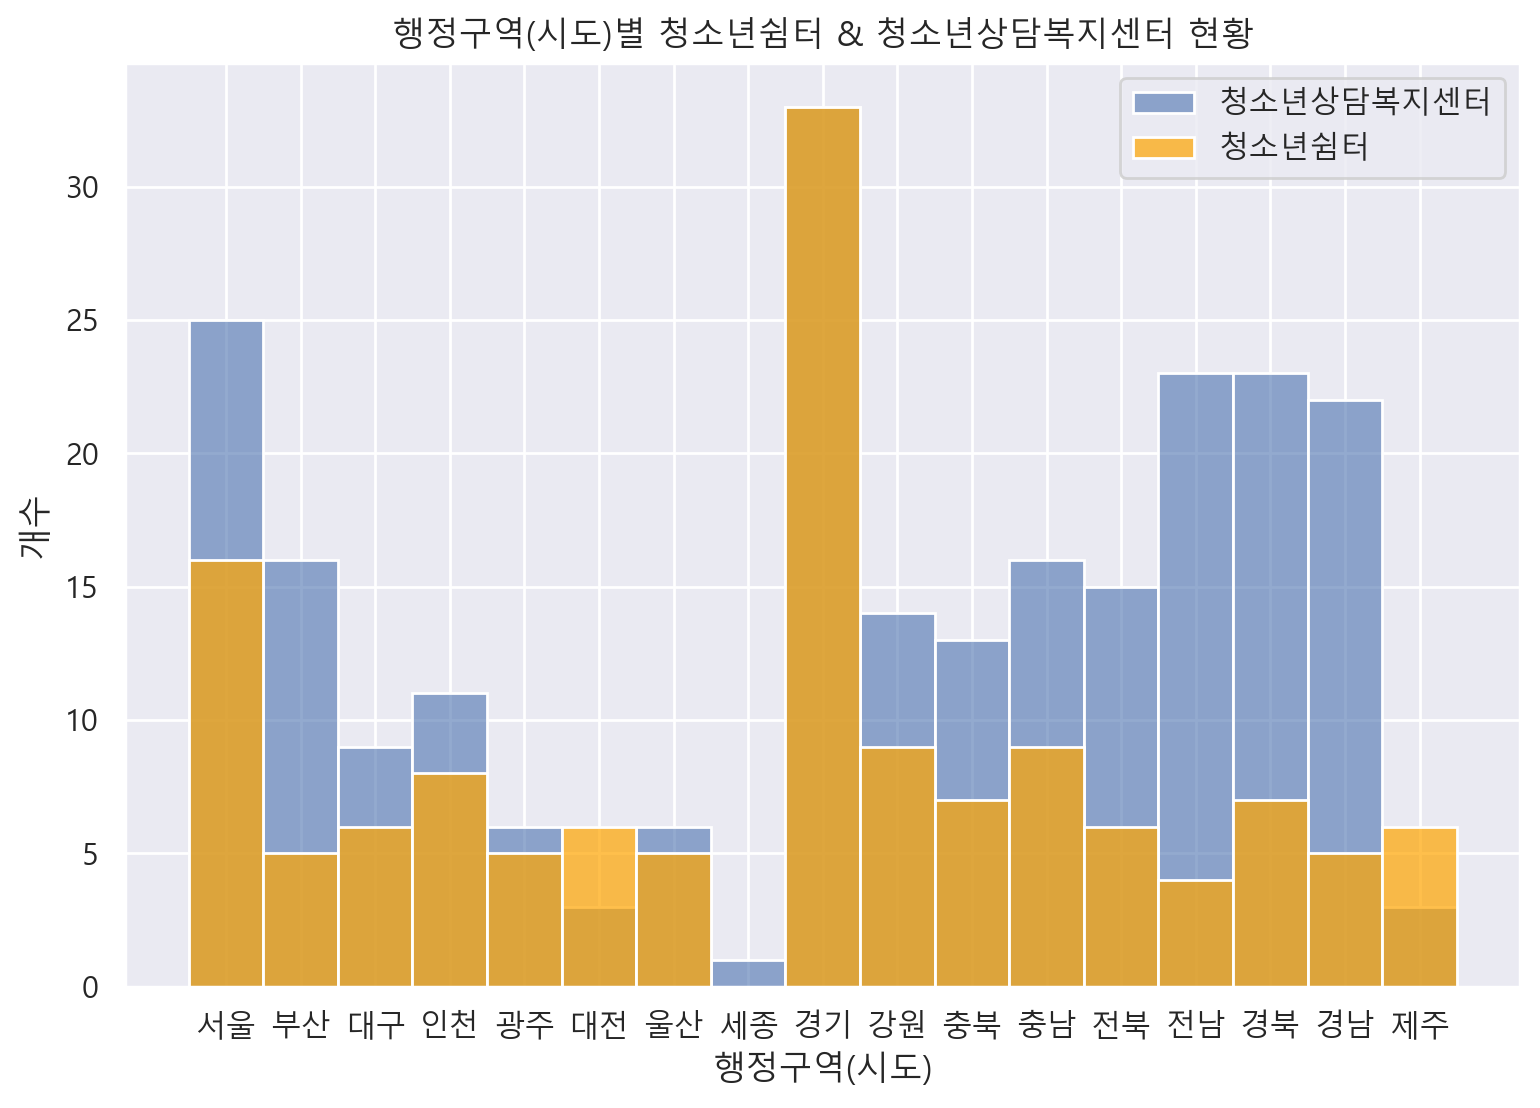

In [418]:
# 지역별 청소년쉼터 & 청소년상담복지센터 현황 시각화
plt.figure(figsize=(9, 6))
sns.histplot(data=y_wcenter_preset, x='시도명', color='b', alpha=0.6)
sns.histplot(data=y_shelter_preset, x='시도명', color='orange', alpha=0.7)
plt.legend(['청소년상담복지센터', '청소년쉼터'])
plt.title('행정구역(시도)별 청소년쉼터 & 청소년상담복지센터 현황')
plt.xlabel('행정구역(시도)')
plt.ylabel('개수')
plt.show()

In [679]:
%cd ..
%cd 인구

C:\Users\User\Desktop\3기_정재희_DX_수도권 1반\공모전\청소년 공모전\data
C:\Users\User\Desktop\3기_정재희_DX_수도권 1반\공모전\청소년 공모전\data\인구


# 청소년인구수 통계 데이터

In [680]:
population = pd.read_csv('2021행정구역별인구.csv', encoding='cp949')
list(population.iloc[0].values) 
col_values = ['시도', '시점', '10~14세', '15~19세', '20~24세']
col_keys = list(population.columns)

population = population.rename(columns=dict(zip(col_keys, col_values)))
population = population.iloc[1:]

#### 1) 청소년인구수 데이터 탐색

In [681]:
population.head()

,시도,시점,10~14세,15~19세,20~24세
1,서울특별시,2021,351446,382368,638048
2,부산광역시,2021,129029,133751,208829
3,대구광역시,2021,105005,111424,158547
4,인천광역시,2021,134896,131154,175046
5,광주광역시,2021,74192,77867,111615


In [682]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      17 non-null     object
 1   시점      17 non-null     object
 2   10~14세  17 non-null     object
 3   15~19세  17 non-null     object
 4   20~24세  17 non-null     object
dtypes: object(5)
memory usage: 812.0+ bytes


#### 2) 청소년인구수 데이터 전처리
- object 칼럼을 int로 변환
- 인구비율, 시설개수, 시설당 담당청소년 인구비 칼럼 추가

In [683]:
change = ['시점', '10~14세', '15~19세', '20~24세']
for c in change:
    population[c] = population[c].astype('int')

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      17 non-null     object
 1   시점      17 non-null     int32 
 2   10~14세  17 non-null     int32 
 3   15~19세  17 non-null     int32 
 4   20~24세  17 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 540.0+ bytes


In [685]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
시점,17.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0
10~14세,17.0,135570.000000,152861.698667,25139.0,68619.0,81088.0,129029.0,656852.0
15~19세,17.0,136076.411765,148861.133424,19452.0,74333.0,87145.0,131154.0,624696.0
20~24세,17.0,189626.705882,211547.929322,19793.0,94687.0,120355.0,175046.0,820998.0


In [686]:
# 청소년인구수 합계 구하기
population_preset = population.copy()
population_preset['합계'] = population['10~14세'] + population['15~19세'] + population['20~24세']

In [687]:
population_preset.head()

,시도,시점,10~14세,15~19세,20~24세,합계
1,서울특별시,2021,351446,382368,638048,1371862
2,부산광역시,2021,129029,133751,208829,471609
3,대구광역시,2021,105005,111424,158547,374976
4,인천광역시,2021,134896,131154,175046,441096
5,광주광역시,2021,74192,77867,111615,263674


In [688]:
# 청소년인구비율 구하기

# 전국 청소년 인구수 총합계
total_ypop = population_preset[['10~14세', '15~19세', '20~24세']].sum().iloc[:].sum()

# 인구비율 = 지역별 청소년 인구수 / 전국 청소년 인구수 총합계
population_preset['인구비율'] = round((population_preset['합계'] / total_ypop) * 100, 2)

In [336]:
# 인구비율로 내림차순 정렬
population_preset = population_preset.sort_values('인구비율', ascending=False)

In [689]:
# 시설개수 칼럼 추가
tmp = y_wcenter_preset.sort_values('시도명')  #청소년상담복지센터 데이터셋을 시도명 별로 정렬
tmp['시도명'].value_counts(sort=False).values #정렬된 데이터셋의 센터 개수 추출

population_preset = population_preset.sort_values(by='시도') #인구 통계 데이터셋을 시도 별로 정렬
population_preset['시설개수'] = tmp[['시도명']].value_counts(sort=False).values #정렬된 인구 통계 데이터셋에 센터 개수 삽입
population_preset

,시도,시점,10~14세,15~19세,20~24세,합계,인구비율,시설개수
10,강원도,2021,63908,68221,94687,226816,2.89,14
9,경기도,2021,656852,624696,820998,2102546,26.81,33
16,경상남도,2021,161109,148364,176035,485508,6.19,22
15,경상북도,2021,108503,114129,151918,374550,4.78,23
5,광주광역시,2021,74192,77867,111615,263674,3.36,6
3,대구광역시,2021,105005,111424,158547,374976,4.78,9
6,대전광역시,2021,68619,78502,120355,267476,3.41,3
2,부산광역시,2021,129029,133751,208829,471609,6.01,16
1,서울특별시,2021,351446,382368,638048,1371862,17.49,25
8,세종특별자치시,2021,25139,19452,19793,64384,0.82,1


In [690]:
# 시설당 담당인구비 계산된 칼럼 추가
population_preset['시설당 담당인구비'] = population_preset['합계'] / population_preset['시설개수']

#확인
population_preset

,시도,시점,10~14세,15~19세,20~24세,합계,인구비율,시설개수,시설당 담당인구비
10,강원도,2021,63908,68221,94687,226816,2.89,14,16201.142857
9,경기도,2021,656852,624696,820998,2102546,26.81,33,63713.515152
16,경상남도,2021,161109,148364,176035,485508,6.19,22,22068.545455
15,경상북도,2021,108503,114129,151918,374550,4.78,23,16284.782609
5,광주광역시,2021,74192,77867,111615,263674,3.36,6,43945.666667
3,대구광역시,2021,105005,111424,158547,374976,4.78,9,41664.000000
6,대전광역시,2021,68619,78502,120355,267476,3.41,3,89158.666667
2,부산광역시,2021,129029,133751,208829,471609,6.01,16,29475.562500
1,서울특별시,2021,351446,382368,638048,1371862,17.49,25,54874.480000
8,세종특별자치시,2021,25139,19452,19793,64384,0.82,1,64384.000000


In [691]:
# 실수 형태의 칼럼을 int 형태로 변환
population_preset['시설당 담당인구비'] = population_preset['시설당 담당인구비'].astype('int')

#확인
population_preset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 10 to 11
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         17 non-null     object 
 1   시점         17 non-null     int32  
 2   10~14세     17 non-null     int32  
 3   15~19세     17 non-null     int32  
 4   20~24세     17 non-null     int32  
 5   합계         17 non-null     int32  
 6   인구비율       17 non-null     float64
 7   시설개수       17 non-null     int64  
 8   시설당 담당인구비  17 non-null     int32  
dtypes: float64(1), int32(6), int64(1), object(1)
memory usage: 952.0+ bytes


In [692]:
# 불필요한 칼럼 삭제
population_preset.drop('시점', axis=1, inplace=True)
population_preset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 10 to 11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         17 non-null     object 
 1   10~14세     17 non-null     int32  
 2   15~19세     17 non-null     int32  
 3   20~24세     17 non-null     int32  
 4   합계         17 non-null     int32  
 5   인구비율       17 non-null     float64
 6   시설개수       17 non-null     int64  
 7   시설당 담당인구비  17 non-null     int32  
dtypes: float64(1), int32(5), int64(1), object(1)
memory usage: 884.0+ bytes


In [693]:
population_preset

,시도,10~14세,15~19세,20~24세,합계,인구비율,시설개수,시설당 담당인구비
10,강원도,63908,68221,94687,226816,2.89,14,16201
9,경기도,656852,624696,820998,2102546,26.81,33,63713
16,경상남도,161109,148364,176035,485508,6.19,22,22068
15,경상북도,108503,114129,151918,374550,4.78,23,16284
5,광주광역시,74192,77867,111615,263674,3.36,6,43945
3,대구광역시,105005,111424,158547,374976,4.78,9,41664
6,대전광역시,68619,78502,120355,267476,3.41,3,89158
2,부산광역시,129029,133751,208829,471609,6.01,16,29475
1,서울특별시,351446,382368,638048,1371862,17.49,25,54874
8,세종특별자치시,25139,19452,19793,64384,0.82,1,64384


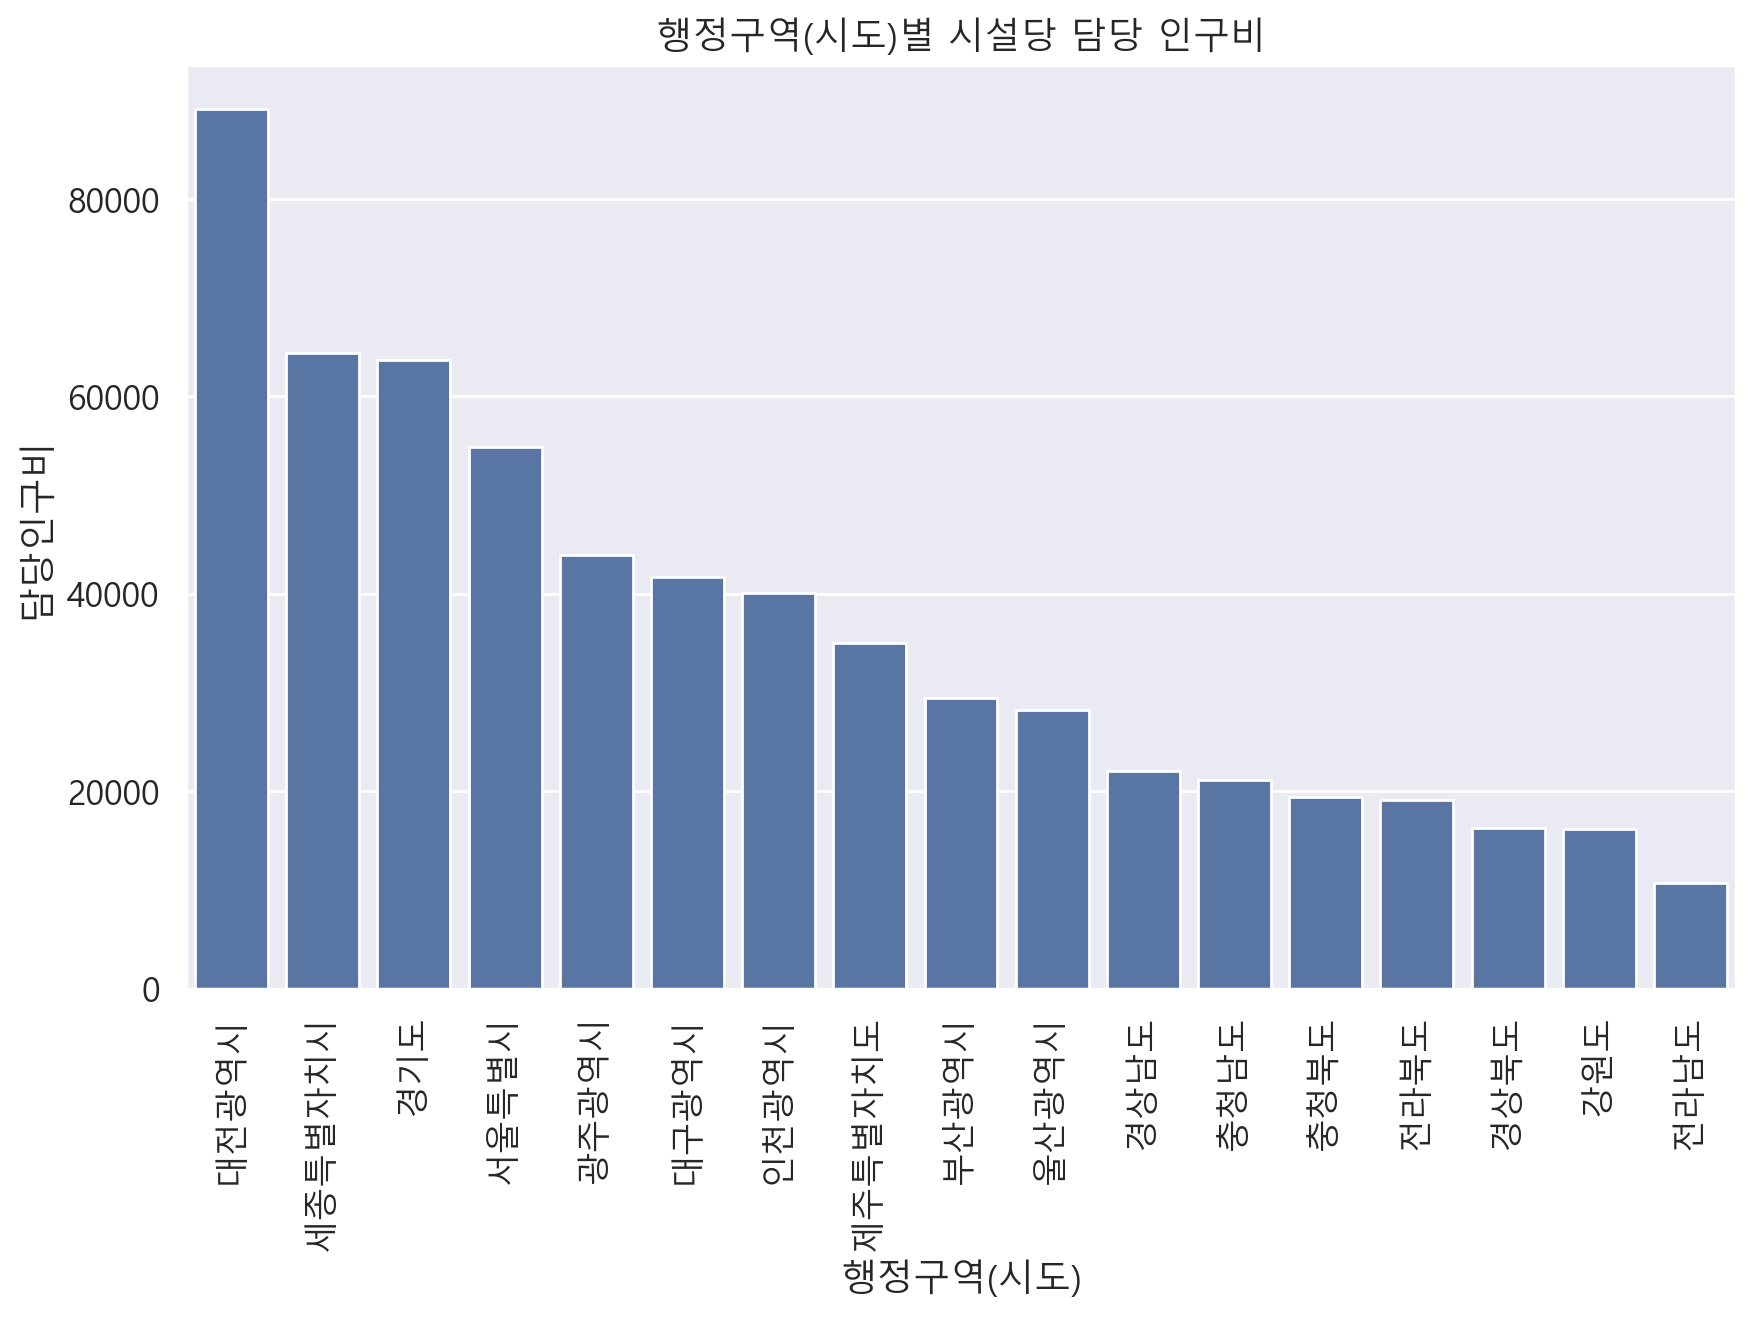

In [695]:
# 행정구역(시도)별 시설당 담당 인구비 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=population_preset.sort_values(by='시설당 담당인구비', ascending=False), x='시도', y='시설당 담당인구비', color='b')
plt.xticks(rotation=90)
plt.title('행정구역(시도)별 시설당 담당 인구비')
plt.xlabel('행정구역(시도)')
plt.ylabel('담당인구비')
plt.show()

In [696]:
# 특정칼럼 [시도, 시설당 담당인구비] 데이터프레임으로 출력
population_preset[['시도', '시설당 담당인구비']].sort_values(by='시설당 담당인구비', ascending=False).reset_index(drop=True)

,시도,시설당 담당인구비
0,대전광역시,89158
1,세종특별자치시,64384
2,경기도,63713
3,서울특별시,54874
4,광주광역시,43945
5,대구광역시,41664
6,인천광역시,40099
7,제주특별자치도,35018
8,부산광역시,29475
9,울산광역시,28249


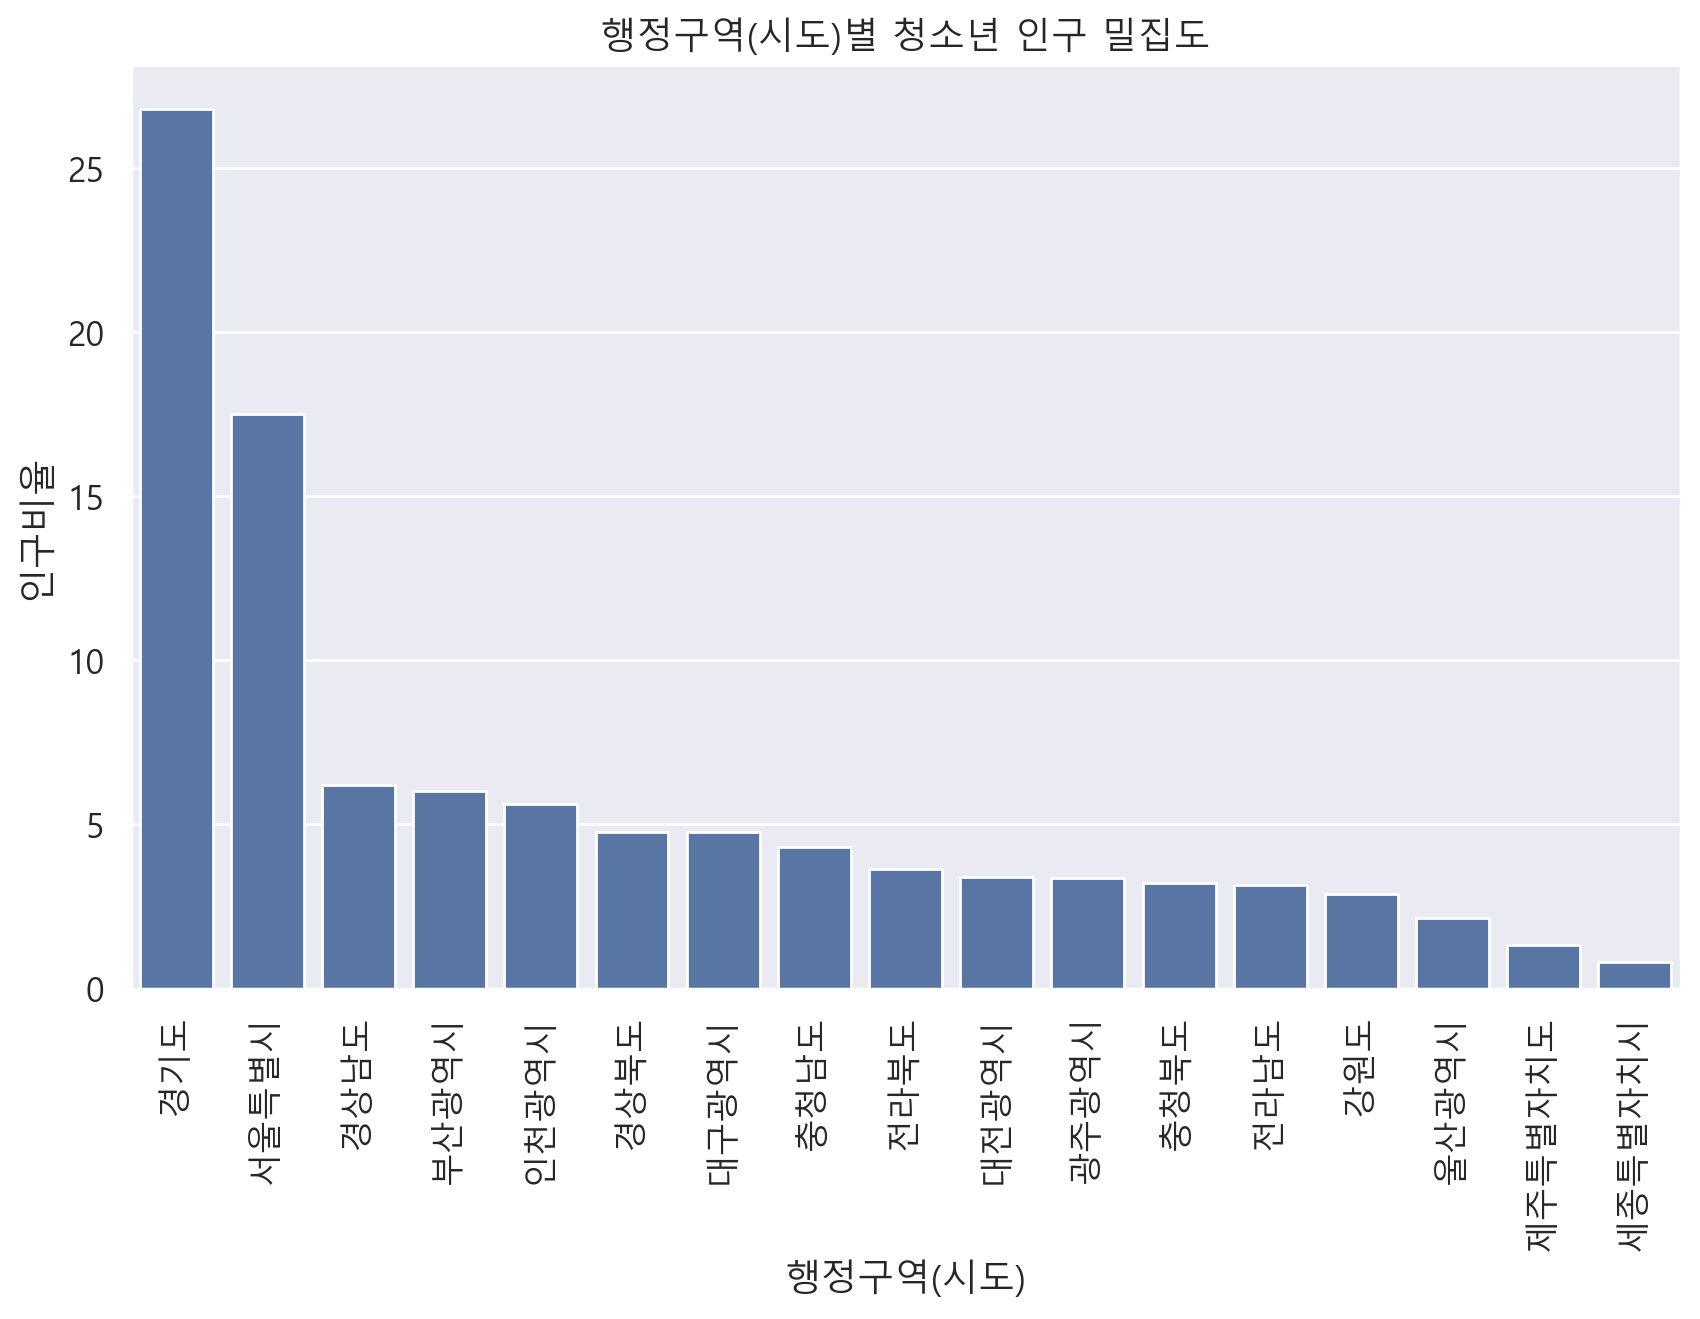

In [697]:
# 행정구역(시도)별 청소년 인구 밀집도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=population_preset.sort_values('인구비율', ascending=False), x='시도', y='인구비율', color='b')
plt.xticks(rotation=90)
plt.title('행정구역(시도)별 청소년 인구 밀집도')
plt.xlabel('행정구역(시도)')
plt.ylabel('인구비율')
plt.show()

In [698]:
# 특정칼럼 [시도, 인구비율] 데이터프레임으로 출력
population_preset[['시도', '인구비율']].sort_values(by='인구비율', ascending=False).reset_index(drop=True)

,시도,인구비율
0,경기도,26.81
1,서울특별시,17.49
2,경상남도,6.19
3,부산광역시,6.01
4,인천광역시,5.63
5,경상북도,4.78
6,대구광역시,4.78
7,충청남도,4.30
8,전라북도,3.65
9,대전광역시,3.41


# 시설별 인지도 데이터

In [481]:
%cd ..
%cd 기관

C:\Users\User\Desktop\3기_정재희_DX_수도권 1반\공모전\청소년 공모전\data
C:\Users\User\Desktop\3기_정재희_DX_수도권 1반\공모전\청소년 공모전\data\기관


## 청소년상담복지센터 인지여부 데이터

In [494]:
#인지여부_청소년상담복지센터.csv

notice_wcenter = pd.read_csv('인지여부_청소년상담복지센터.csv', encoding='cp949', skiprows=[0]) 
notice_wcenter.drop('특성별(1)', axis=1, inplace=True)
list(notice_wcenter.iloc[0].values) 

col_values = list(notice_wcenter.iloc[0].values) 
col_keys = list(notice_wcenter.columns)

notice_wcenter = notice_wcenter.rename(columns=dict(zip(col_keys, col_values)))
notice_wcenter = notice_wcenter.iloc[1:]
notice_wcenter

,소계,기관이나 서비스를 모른다,기관이나 서비스를 안다,이용해본 적 없다,이용해본 적 있다,전혀 도움이 되지 않았다,별로 도움이 되지 않았다,약간 도움이 되었다,매우 도움이 되었다
1,4150,19.8,80.2,42.3,57.7,2.7,5.7,38.5,53.1


#### 데이터 시각화 및 분석

In [541]:
#, '이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다'


x1 = notice_wcenter.iloc[0][1:].values[:2]
labels1 = ['기관이나 서비스를 모른다', '기관이나 서비스를 안다']


x2 = notice_wcenter.iloc[0][1:].values[2:4]
labels2 = ['이용해본 적 없다', '이용해본 적 있다']

x3 = notice_wcenter.iloc[0][1:].values[4:-1]
labels3 = ['별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']


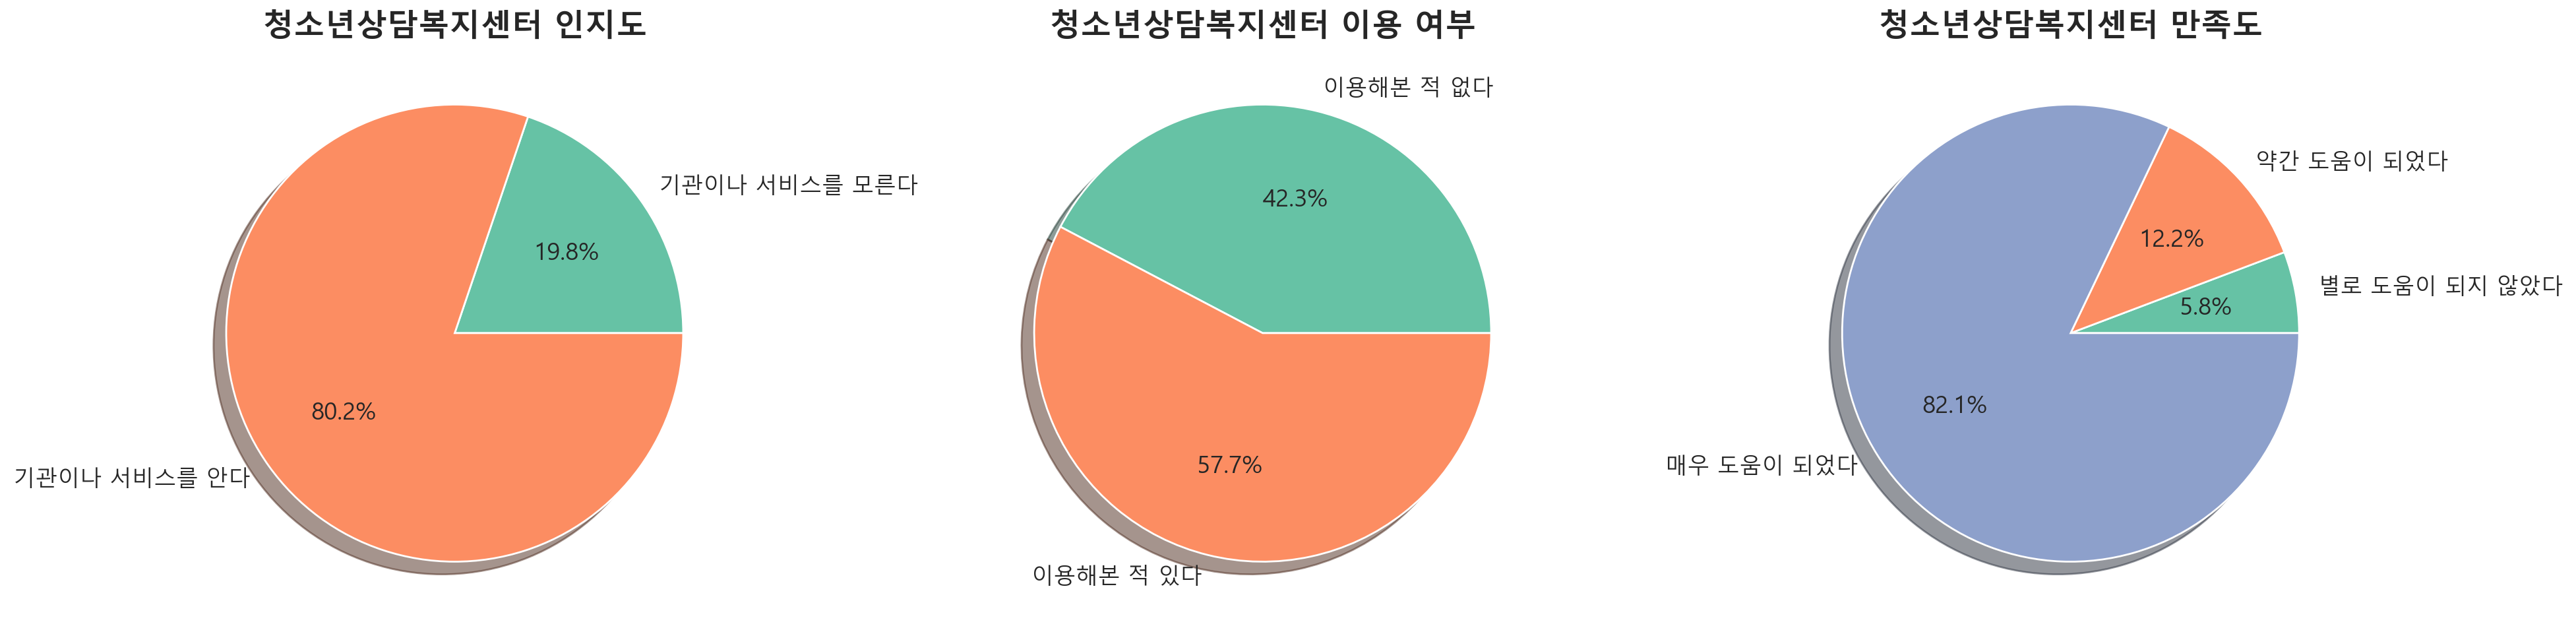

In [632]:
colors = sns.color_palette('Set2',len(color_labs))
color_labs = ['이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(x=x1, labels=labels1, autopct='%1.1f%%', labeldistance=1.1 , colors=colors , shadow=True)
plt.title('청소년상담복지센터 인지도',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 2)
plt.pie(x=x2, labels=labels2, autopct='%1.1f%%', labeldistance=1.1, colors=colors,  shadow=True)
plt.title('청소년상담복지센터 이용 여부',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 3)
plt.pie(x=x3, labels=labels3, autopct='%1.1f%%', labeldistance=1.1, colors=colors, shadow=True)
plt.title('청소년상담복지센터 만족도',fontdict={"fontsize":17, 'weight':'bold'})

plt.tight_layout()
plt.show()

## 청소년전화1388 인지여부 데이터

In [536]:
#인지여부_청소년전화1388.csv

notice_1388 = pd.read_csv('인지여부_청소년전화1388.csv', encoding='cp949', skiprows=[0])
col_values = list(notice_1388.iloc[0].values) 
col_keys = list(notice_1388.columns)

notice_1388 = notice_1388.rename(columns=dict(zip(col_keys, col_values)))
notice_1388 = notice_1388.iloc[1:]
notice_1388.drop('특성별(1)', axis=1, inplace=True)
notice_1388

,소계,기관이나 서비스를 모른다,기관이나 서비스를 안다,이용해본 적 없다,이용해본 적 있다,전혀 도움이 되지 않았다,별로 도움이 되지 않았다,약간 도움이 되었다,매우 도움이 되었다
1,4143,21.0,79.0,72.2,27.8,11.5,13.8,36.1,38.6


#### 데이터 시각화 및 분석

In [543]:
#, '이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다'


y1 = notice_1388.iloc[0][1:].values[:2]
ylabels1 = ['기관이나 서비스를 모른다', '기관이나 서비스를 안다']


y2 = notice_1388.iloc[0][1:].values[2:4]
ylabels2 = ['이용해본 적 없다', '이용해본 적 있다']

y3 = notice_1388.iloc[0][1:].values[4:-1]
ylabels3 = ['별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']


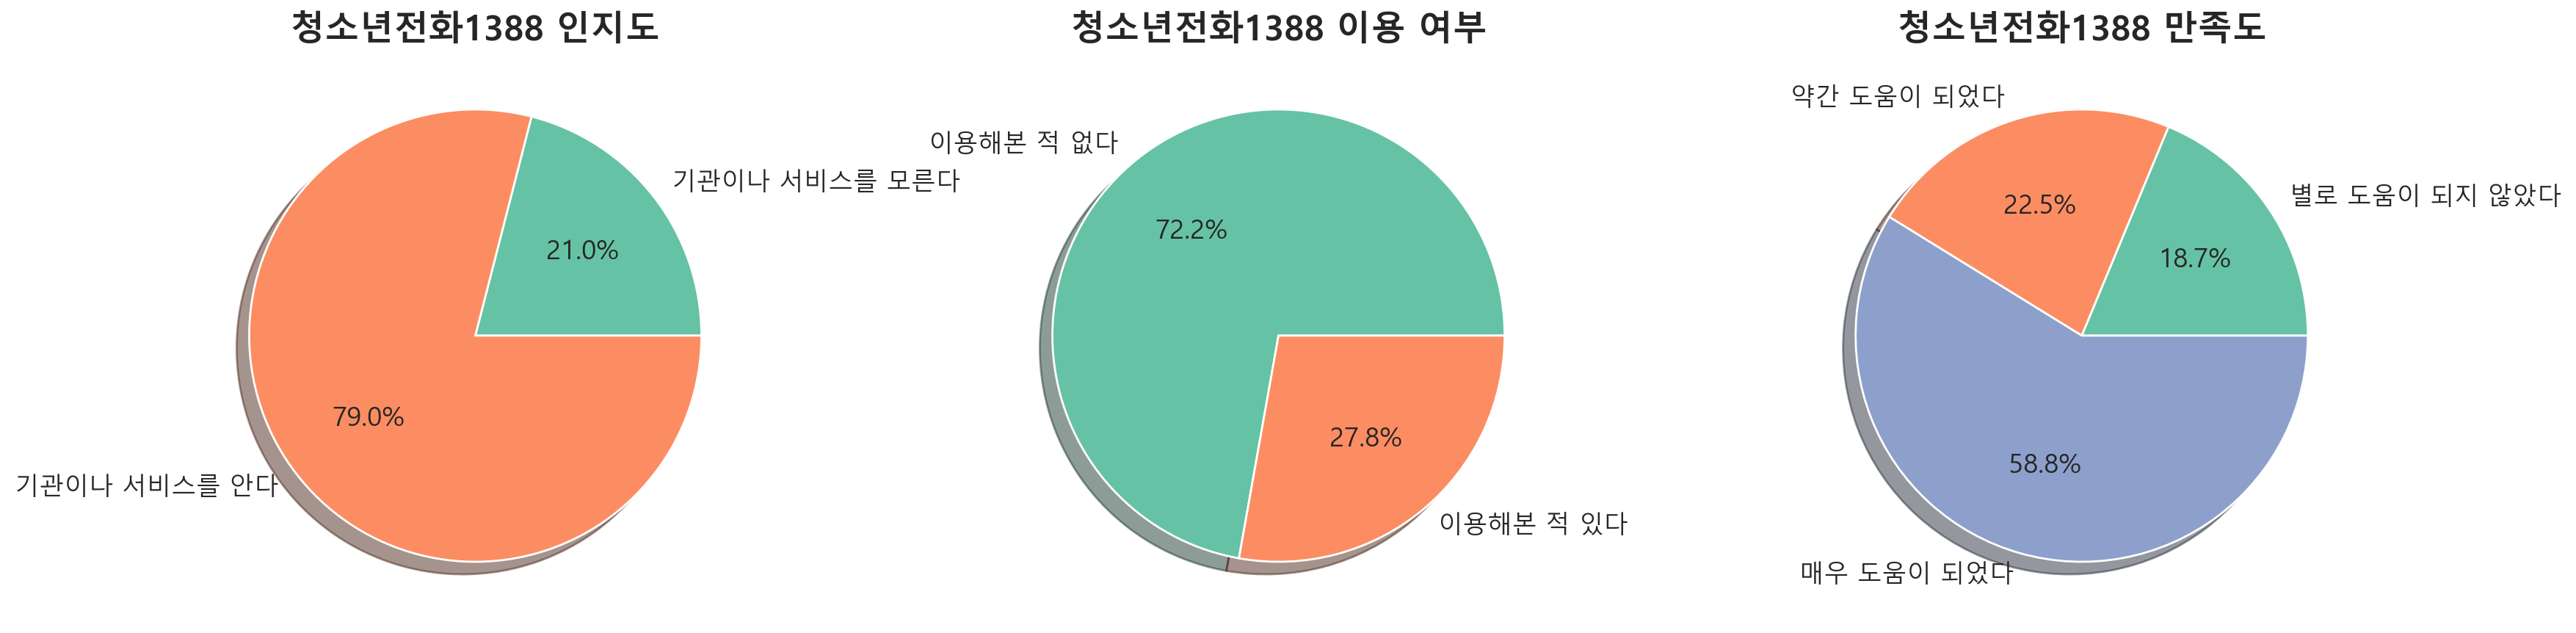

In [631]:
colors = sns.color_palette('Set2',len(color_labs))
color_labs = ['이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(x=y1, labels=ylabels1, autopct='%1.1f%%', labeldistance=1.1, colors = colors, shadow=True)
plt.title('청소년전화1388 인지도',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 2)
plt.pie(x=y2, labels=ylabels2, autopct='%1.1f%%', labeldistance=1.1, colors =  colors, shadow=True)
plt.title('청소년전화1388 이용 여부',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 3)
plt.pie(x=y3, labels=ylabels3, autopct='%1.1f%%', labeldistance=1.1, colors = colors, shadow=True)
plt.title('청소년전화1388 만족도',fontdict={"fontsize":17, 'weight':'bold'})

plt.show()

## Wee센터 인지여부 데이터

In [585]:
#인지여부_Wee센터.csv

notice_wee = pd.read_csv('인지여부_Wee센터.csv', encoding='cp949', skiprows=[0])
col_values = list(notice_wee.iloc[0].values) 
col_keys = list(notice_wee.columns)

notice_wee = notice_wee.rename(columns=dict(zip(col_keys, col_values)))
notice_wee = notice_wee.iloc[1:]
notice_wee.drop('특성별(1)', axis=1, inplace=True)
notice_wee

,소계,기관이나 서비스를 모른다,기관이나 서비스를 안다,이용해본 적 없다,이용해본 적 있다,전혀 도움이 되지 않았다,별로 도움이 되지 않았다,약간 도움이 되었다,매우 도움이 되었다
1,4145,18.2,81.8,38.6,61.4,10.3,13.0,43.5,33.1


#### 데이터 시각화 및 분석

In [586]:
# '이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다'


z1 = notice_wee.iloc[0][1:].values[:2]
zlabels1 = ['기관이나 서비스를 모른다', '기관이나 서비스를 안다']


z2 = notice_wee.iloc[0][1:].values[2:4]
zlabels2 = ['이용해본 적 없다', '이용해본 적 있다']

z3 = notice_wee.iloc[0][1:].values[4:-1]
zlabels3 = ['별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']


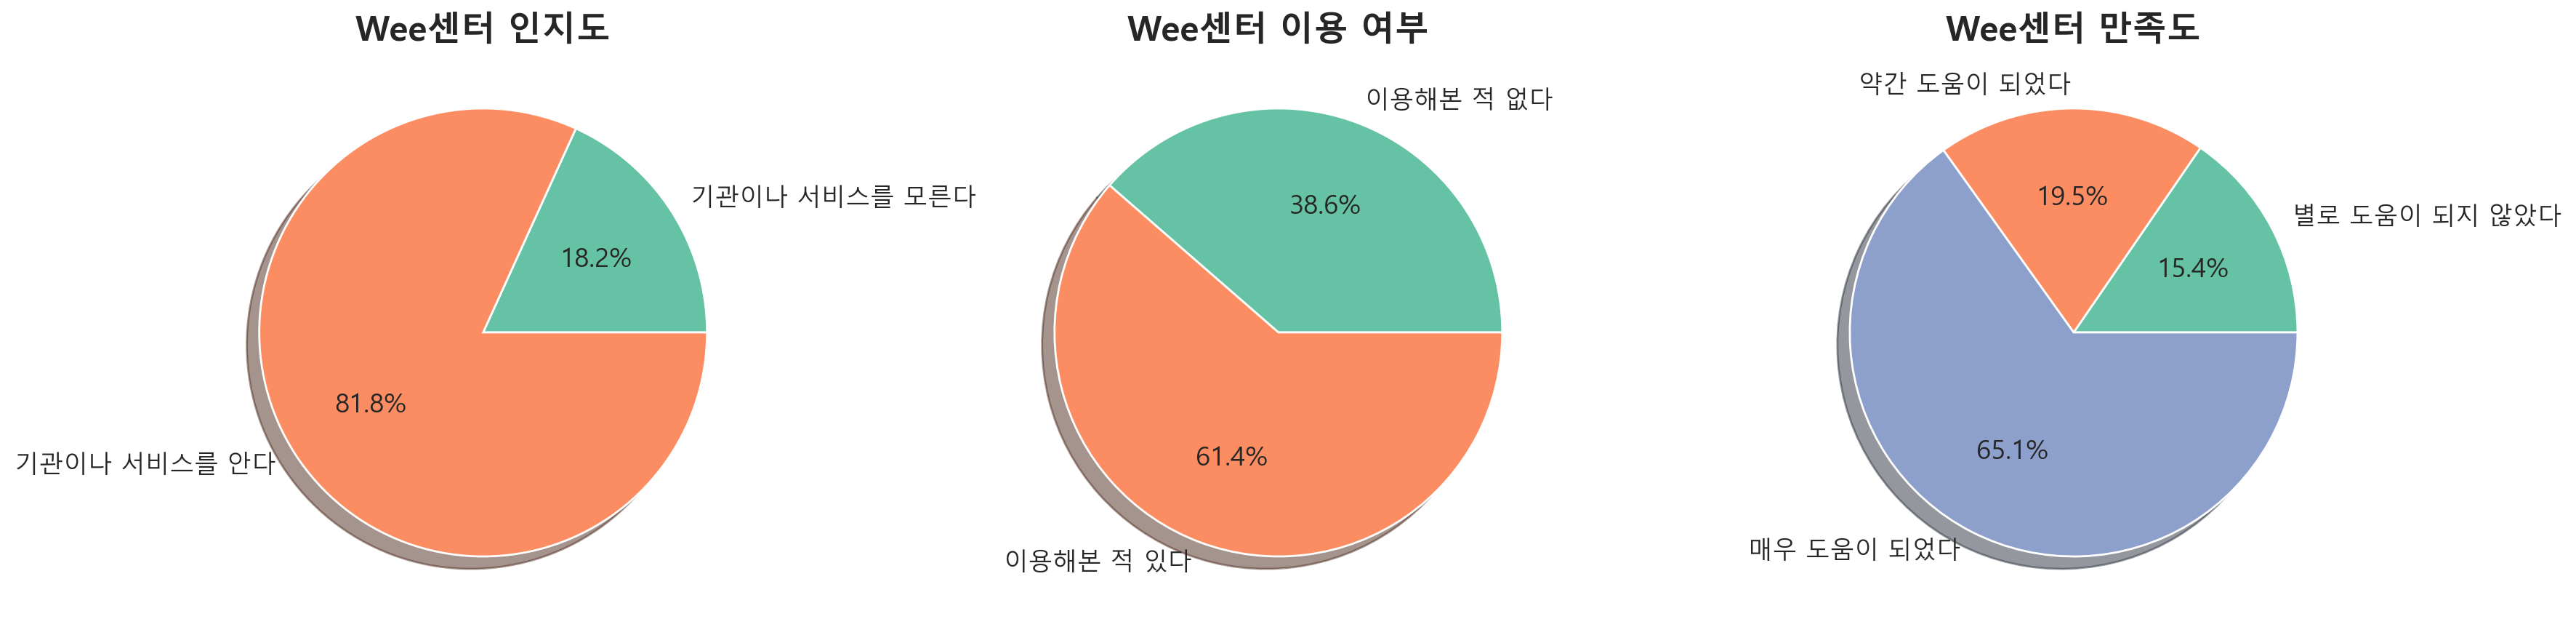

In [619]:
colors = sns.color_palette('Set2',len(color_labs))
color_labs = ['이용해본 적 없다', '이용해본 적 있다','전혀 도움이 되지 않았다', '별로 도움이 되지 않았다', '약간 도움이 되었다', '매우 도움이 되었다']

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(x=z1, labels=zlabels1, autopct='%1.1f%%', labeldistance=1.1, colors = colors, shadow=True)
plt.title('Wee센터 인지도',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 2)
plt.pie(x=z2, labels=zlabels2, autopct='%1.1f%%', labeldistance=1.1, colors =  colors, shadow=True)
plt.title('Wee센터 이용 여부',fontdict={"fontsize":17, 'weight':'bold'})

plt.subplot(1, 3, 3)
plt.pie(x=z3, labels=zlabels3, autopct='%1.1f%%', labeldistance=1.1, colors = colors, shadow=True)
plt.title('Wee센터 만족도',fontdict={"fontsize":17, 'weight':'bold'})

plt.show()

# 여기부터는 경근햄 담당 데이터셋 (지워도되고 남겨도 됨)

# 상담유형별 데이터

In [51]:
# "2019상담유형_주제.csv"
# "2020상담유형_주제.csv"
# "2022상담유형_주제.csv"
# "2019연령별상담통계.csv"
# "2020연령별상담통계.csv"
# "2019지역별상담통계.csv"
# "2020지역별상담통계.csv"
# "2020또래상담데이터.csv"

# subject19 = pd.read_csv("2019상담유형_주제.csv", encoding='utf-8')
# subject20 = pd.read_csv("2020상담유형_주제.csv", encoding='utf-8')
subject22 = pd.read_csv("2022상담유형_주제.csv", encoding='utf-8')

consult_age19 = pd.read_csv("2019연령별상담통계.csv", encoding='utf-8')
consult_age20 = pd.read_csv("2020연령별상담통계.csv", encoding='utf-8')

consult_area19 = pd.read_csv("2019지역별상담통계.csv", encoding='utf-8')
consult_area20 = pd.read_csv("2020지역별상담통계.csv", encoding='utf-8')

yconsult = pd.read_csv("2020또래상담데이터.csv", encoding='utf-8')

In [68]:
keys_sub = list(subject22.columns)
values_sub = ['일련번호',
'상담유형명',
'기준년도',
'상담횟수']

subject22 = subject22.rename(columns=dict(zip(keys_sub, values_sub)))
subject22

,일련번호,상담유형명,기준년도,상담횟수
0,1,가정,2014,"287,465"
1,2,일탈/비행,2014,"427,998"
2,3,학업/진로,2014,"1,145,148"
3,4,성,2014,"79,638"
4,5,대인 관계,2014,"789,687"
...,...,...,...,...
83,84,정신 건강,2021,"1,130,526"
84,85,생활 습관 태도,2021,"44,123"
85,86,활동,2021,"52,856"
86,87,컴퓨터/인터넷,2021,"459,028"


In [147]:
subject22['상담유형명'].value_counts()

가정          8
일탈/비행       8
학업/진로       8
성           8
대인 관계       8
성격          8
정신 건강       8
생활 습관 태도    8
활동          8
컴퓨터/인터넷     8
단순 정보 제공    8
Name: 상담유형명, dtype: int64

In [149]:
subject22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일련번호    88 non-null     int64 
 1   상담유형명   88 non-null     object
 2   기준년도    88 non-null     int64 
 3   상담횟수    88 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.9+ KB


In [152]:
pd.set_option('display.max_rows', None)

In [157]:
subject22['상담횟수'] = subject22['상담횟수'].str.replace(',', '').astype('int')
subject22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일련번호    88 non-null     int64 
 1   상담유형명   88 non-null     object
 2   기준년도    88 non-null     int64 
 3   상담횟수    88 non-null     int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 2.5+ KB


In [162]:
subject22_profile = subject22.groupby('상담유형명', as_index=False)[['상담횟수']].sum().sort_values('상담횟수', ascending=False)

In [165]:
subject22_profile

,상담유형명,상담횟수
2,대인 관계,8706751
9,학업/진로,6288756
7,정신 건강,5473145
6,일탈/비행,3708068
8,컴퓨터/인터넷,3070144
0,가정,2959302
5,성격,2512050
1,단순 정보 제공,2134867
4,성,632197
10,활동,512324


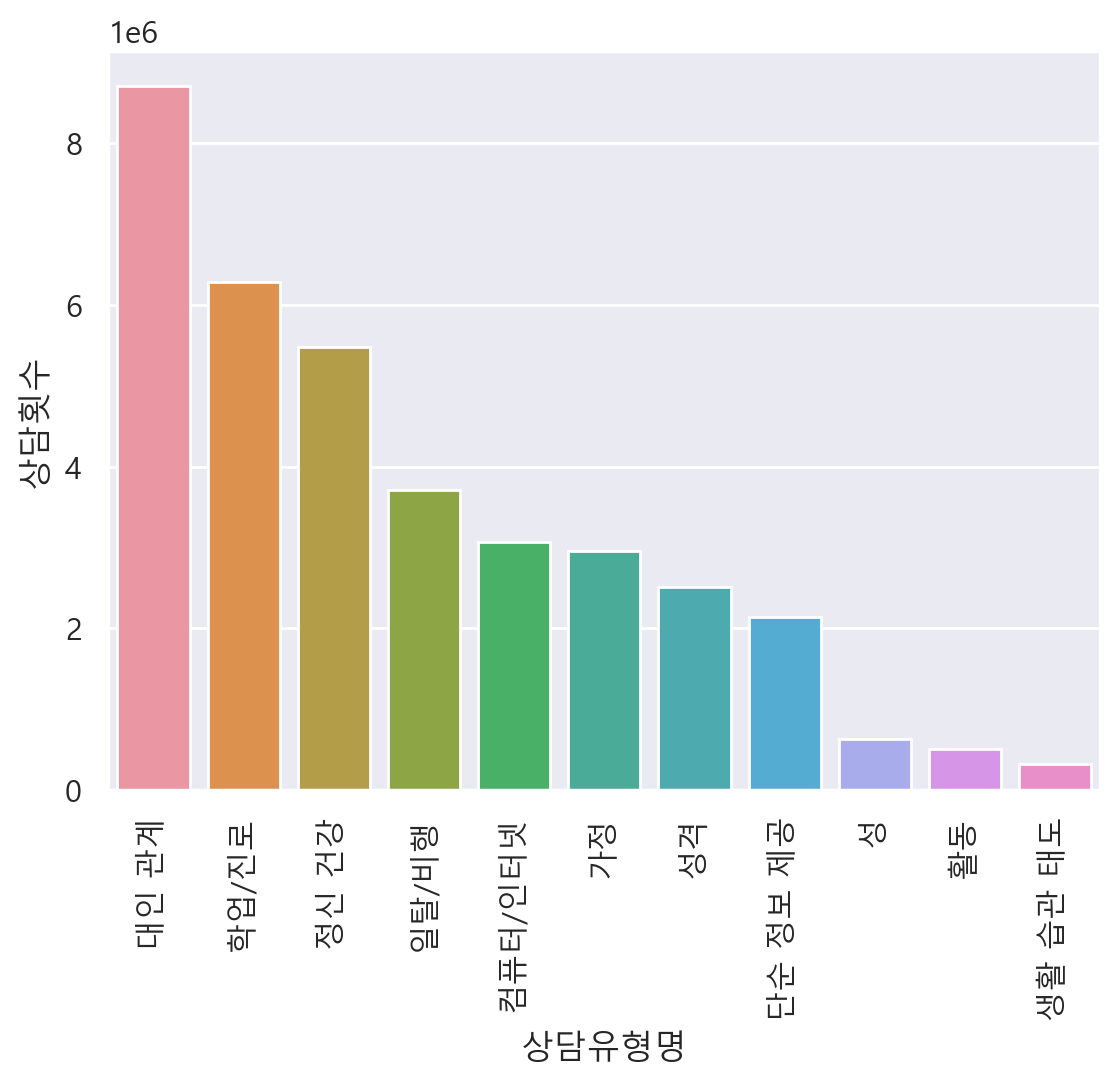

In [164]:
sns.barplot(data=subject22_profile, x='상담유형명', y='상담횟수')
plt.xticks(rotation=90)
plt.show()

인사이트:
- 청소년 상담 유형 순위 top 5는 대인관계 > 학업/진로 > 정신건강 > 일탈/비행 > 컴퓨터/인터넷
- 대인관계 관련 상담은 주로 친구문제나 이성문제일 것으로 생각된다
- 학업/진로 관련 상담은 주로 자퇴/성적/대학진학 문제일 것으로 생각된다
- 정신건강 관련 상담은 대인, 학업, 가정 등의 복합적인 문제로 발생되는 극도의 스트레스로 인한 정신적 문제일 것으로 생각된다
- 일탈/비행 관련 상담은

In [60]:
keys = list(consult_age19.columns)

In [62]:
values = ['일련번호',
'교급구분명',
'전체상담수',
'가족상담수',
'일탈상담수',
'학업상담수',
'성상담수',
'성격상담수',
'대인관계상담수',
'정신건강상담수',
'외모상담수',
'PC상담수',
'정보상담수',
'법률상담수',
'활동상담수'
,'기타상담수']

In [66]:
# 영문 칼렴명 한글 칼럼명으로 변환
consult_age19 = consult_age19.rename(columns=dict(zip(keys, values)))
consult_age20 = consult_age20.rename(columns=dict(zip(keys, values)))

In [145]:
consult_age20

,일련번호,교급구분명,전체상담수,가족상담수,일탈상담수,학업상담수,성상담수,성격상담수,대인관계상담수,정신건강상담수,외모상담수,PC상담수,정보상담수,법률상담수,활동상담수,기타상담수
0,1,초등학생,1559859,105681,91284,133259,21676,169213,608770,171325,13670,188539,28975,551,24123,2793
1,2,중학생,1495501,112993,195013,254815,27652,81384,366439,218415,10672,167154,35175,621,22373,2795
2,3,고등학생,1254309,93719,172904,273338,25259,60044,268492,230818,10747,56162,33873,1205,22643,5105
3,4,대학생,147096,13475,4884,17799,3727,11798,31662,43364,1803,2543,8098,266,3881,3796


In [135]:
keys_area = list(consult_area19.columns)
values_area = ['일련번호',
'지역명',
'전체상담수',
'가족유형수',
'일탈유형수',
'학업진로유형수',
'성유형수',
'대인관계유형수',
'성격유형수',
'정신건강유형수',
'생활습관태도유형수',
'활동유형수',
'PC인터넷유형수',
'단순정보제공유형수']

consult_area19 = consult_area19.rename(columns=dict(zip(keys_area, values_area)))

In [141]:
consult_area20 = consult_area20.rename(columns=dict(zip(list(consult_area20.columns), values_area)))
consult_area20

,일련번호,지역명,전체상담수,가족유형수,일탈유형수,학업진로유형수,성유형수,대인관계유형수,성격유형수,정신건강유형수,생활습관태도유형수,활동유형수,PC인터넷유형수,단순정보제공유형수
0,1,서울,758827,78683,71060,119812,12610,184396,47469,129715,8272,14681,37625,54504
1,2,부산,321413,32947,24596,51673,9449,81800,26815,40587,5070,546,26709,21221
2,3,대구,136540,15972,15817,16239,1341,34811,13789,9336,2549,189,17121,9376
3,4,인천,162143,12063,22182,19220,2086,27718,8864,41185,821,3336,11626,13042
4,5,광주,84521,10480,6939,11454,1352,15044,5474,8905,826,33,16220,7794
5,6,대전,95494,6171,12119,10554,1560,17873,6553,15430,309,752,8866,15307
6,7,울산,116253,11962,8967,18731,1559,34277,10696,13658,872,215,10224,5092
7,8,세종,13047,881,1690,1354,171,4974,274,2093,32,2,1466,110
8,9,경기,1107832,72369,107464,228042,10359,335253,76329,122396,14145,15593,66070,59812
9,10,강원,89992,6587,8959,18253,986,16454,6465,5768,1068,3803,14565,7084
